# 8. Pengujian dan Evaluasi
Evaluasi model membantu kita mengetahui seberapa baik model kita dalam memberikan hasil yang tepat. Untuk mengevaluasi model, kita dapat menggunakan beberapa metode atau ukuran yang bisa memberikan gambaran objektif tentang kinerja model. Beberapa ukuran yang sering digunakan adalah akurasi, presisi, recall, dan F1-score. Akurasi adalah metrik evaluasi yang mengukur seberapa baik model membuat prediksi yang benar dari total prediksi yang dilakukan. Precision adalah metrik evaluasi yang mengukur seberapa baik model membuat prediksi yang benar untuk kelas positif dari total prediksi positif yang dilakukan.  Recall adalah metrik evaluasi yang menggambarkan seberapa baik suatu model dalam mengidentifikasi kelas positif dengan benar. F1-score merupakan metrik evaluasi yang mencerminkan keseimbangan antara precision dan recall. (Rina, 2023)

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from warnings import filterwarnings

In [11]:
filterwarnings("ignore")

In [12]:
folder_path = 'output/7_modelling/'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
display(file_list)

['output/7_modelling/actual.csv',
 'output/7_modelling/predict_k_05.csv',
 'output/7_modelling/predict_k_10.csv',
 'output/7_modelling/predict_k_15.csv',
 'output/7_modelling/predict_k_20.csv',
 'output/7_modelling/predict_k_25.csv',
 'output/7_modelling/predict_k_30.csv',
 'output/7_modelling/predict_k_35.csv',
 'output/7_modelling/predict_k_40.csv',
 'output/7_modelling/predict_k_45.csv',
 'output/7_modelling/predict_k_50.csv']

In [13]:
df = pd.read_parquet('output/4_feature_engineering/test.parquet')[['sentiment']]
df = pd.concat([pd.read_csv(file) for file in file_list], axis=1)
display(df)

,sentiment,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,0
2,-1,1,1,1,1,1,1,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,1
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1948,0,0,0,0,0,0,0,0,0,0,0
1949,0,1,0,0,0,0,0,0,0,0,0
1950,1,1,1,1,1,1,1,1,1,1,1
1951,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_accuracy = pd.DataFrame()
for column in df.drop(columns=['sentiment']).columns.to_list():
  df_accuracy[column] = pd.Series([accuracy_score(df['sentiment'].to_list(), df[column].to_list())])
display(df_accuracy)

,k_5,k_10,k_15,k_20,k_25,k_30,k_35,k_40,k_45,k_50
0,0.615975,0.65233,0.671787,0.681516,0.682028,0.68766,0.684076,0.68766,0.689196,0.692268


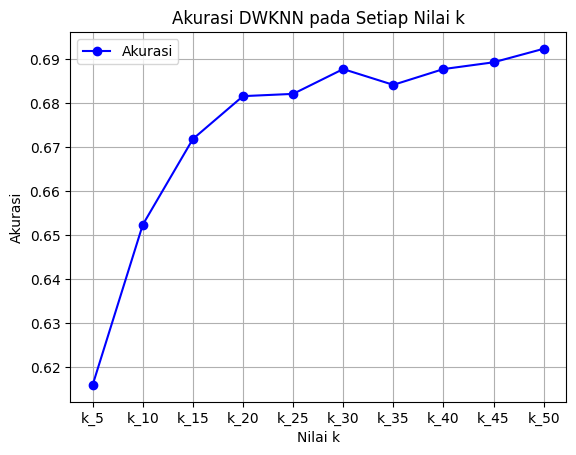

In [15]:
plt.plot(df_accuracy.columns, df_accuracy.iloc[0], marker='o', linestyle='-', color='b', label='Akurasi')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.title('Akurasi DWKNN pada Setiap Nilai k')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
k_max = df_accuracy.iloc[:, 0:].idxmax(axis=1)
display(k_max)

0    k_50
dtype: object

In [17]:
print(classification_report(df['sentiment'].to_list(), df[str(k_max[0])].to_list()))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       119
           0       0.69      0.89      0.78      1181
           1       0.69      0.45      0.55       653

    accuracy                           0.69      1953
   macro avg       0.46      0.45      0.44      1953
weighted avg       0.65      0.69      0.66      1953

